In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  #library for Cluster Analysis (unsupervised learning)
%matplotlib inline

In [3]:
df = pd.read_csv('single_family_home_values.csv')

In [4]:
X = df.drop('estimated_value', axis=1)

In [5]:
X = X[['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'priorSaleAmount']]

In [6]:
X.fillna(0,inplace=True)

In [7]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [7]:
kmeans.cluster_centers_ #gets the cluster centroid coordinates (7 dimensions because it is 7 features)

array([[3.31226296e+00, 3.83944374e+00, 8.42730721e+00, 2.69720607e+03,
        6.97174968e+03, 1.94200506e+03, 7.43586930e+05],
       [2.64078392e+00, 1.93525180e+00, 5.86293724e+00, 1.39300918e+03,
        5.94409712e+03, 1.93060060e+03, 3.93563157e+04],
       [3.00000000e+00, 4.50000000e+00, 9.00000000e+00, 3.74800000e+03,
        8.59750000e+03, 1.99800000e+03, 1.37500550e+07],
       [3.73118280e+00, 5.64516129e+00, 1.04408602e+01, 4.51996774e+03,
        1.30122688e+04, 1.96766667e+03, 2.37729552e+06],
       [2.70373430e+00, 2.27247191e+00, 6.20290813e+00, 1.47484848e+03,
        5.39461203e+03, 1.92551404e+03, 2.93157062e+05]])

In [8]:
labels = kmeans.labels_

In [9]:
X['cluster'] = labels

In [27]:
X.groupby('cluster').median()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,3.0,4.0,8.0,2582.0,6250.0,1927.0,651500.0
1,2.0,2.0,5.0,1133.0,6236.5,1928.5,0.0
2,3.0,4.5,9.0,3748.0,8597.5,1998.0,13750055.0
3,4.0,6.0,10.0,4424.0,8580.0,1989.0,2200000.0
4,3.0,2.0,6.0,1327.0,5210.0,1923.0,279900.0


In [10]:
X = X.drop('cluster', axis=1)

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
for i in range(3,10):
    kmeans = KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    silhouette_score(X, labels)

In [0]:
#Classification and Regression --> supervised learning

In [20]:
#models
from sklearn.linear_model import LinearRegression, LogisticRegression    #Linear Regression predicts; Logistic Regression classifies
from sklearn.svm import SVC, SVR                                         #support vector classifier; suppor vector regressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#measures and tests
from sklearn.model_selection import train_test_split                     #splits training and test sets
from sklearn.metrics import confusion_matrix

In [0]:
## LINEAR REGRESSION

In [9]:
y=df.estimated_value

In [12]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.7648477834199695

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)   # training, fit uses one subdataset
lr.score(X_test,y_test)   # evaluate, scoring, R2 uses one subdataset

0.6914008198366766

In [16]:
df['estimated_value_bins'] = df.estimated_value.apply(lambda x:'high' if x>500000 else 'low')

In [17]:
df.estimated_value_bins.value_counts()

high    7963
low     7037
Name: estimated_value_bins, dtype: int64

In [0]:
## LOGISTIC REGRESSION

In [18]:
y2 = df.estimated_value_bins                                 # categorical variable for classification tests
X_train, X_test, y2_train, y2_test = train_test_split(X,y2)

In [19]:
log = LogisticRegression()
log.fit(X_train,y2_train)   # training, fit uses one subdataset
log.score(X_test,y2_test)   # evaluate, scoring, R2 uses one subdataset

0.8346666666666667

In [21]:
y_pred = log.predict(X_test)
confusion_matrix(y2_test,y_pred)   # TP, FP, TN, FN

array([[1638,  360],
       [ 260, 1492]])

In [0]:
## SVM

In [22]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
#really bad

-0.06561504367907944

In [23]:
svc = SVC()
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.6965333333333333

In [24]:
y2_pred = svc.predict(X_test)
confusion_matrix(y2_test,y2_pred)   # TP, FP, TN, FN
#not so good either

array([[1027,  971],
       [ 167, 1585]])

In [0]:
## KNN

In [25]:
#KNR
knr=KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test)


-0.23373107709747432

In [26]:
#KNC
knc = KNeighborsClassifier()
knc.fit(X_train,y2_train)
knc.score(X_test, y2_test)

0.8274666666666667

In [27]:
y2_pred =  knc.predict(X_test)
confusion_matrix(y2_test,y2_pred)   # TP, FP, TN, FN

array([[1642,  356],
       [ 291, 1461]])

In [0]:
# The best models are Logistic Regression and KNeighbors Classifier, the decision can be taken based on what wewant (low type I error or type II error)

<AxesSubplot:>

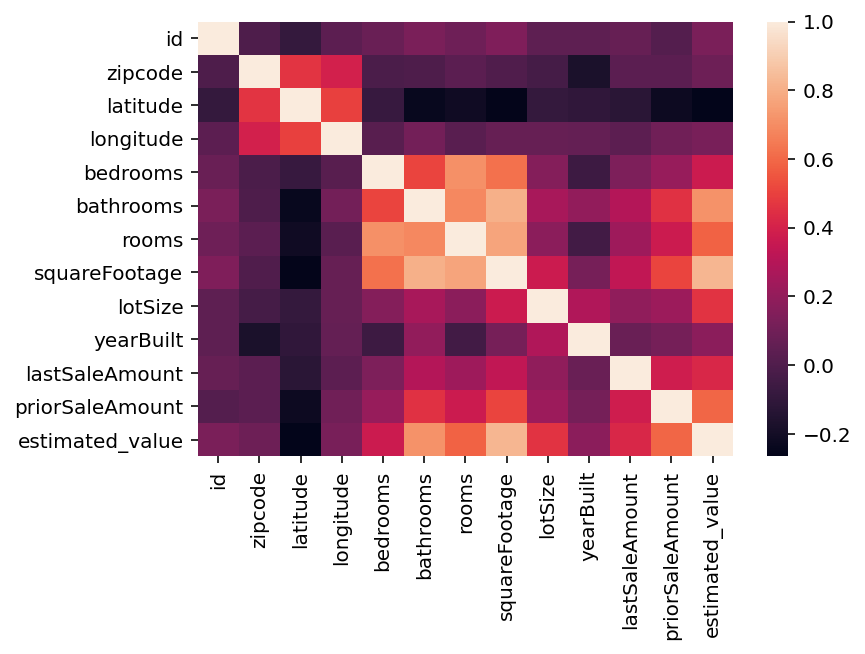

In [30]:
sns.heatmap(df.corr())    #df.corr is a score matrix of all numerical fields of the dataframe(-1 to 1)

# correlation is the standardized form of covariance, which is the relationship between the variance of each feature

In [0]:
# To detect outliers:
# 1) Three sigma rule --> histograms
# 2) Boxplots

====
bedrooms
mean 2.7084
std 0.8972307998543382


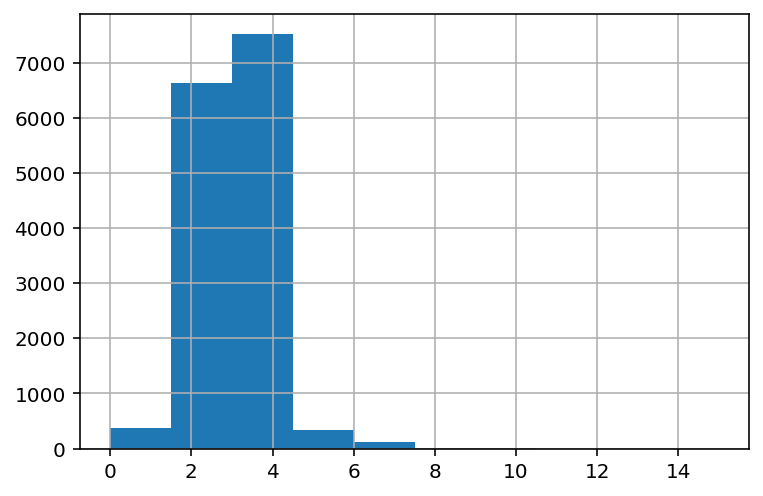

====
bathrooms
mean 2.1950666666666665
std 1.1662788442928953


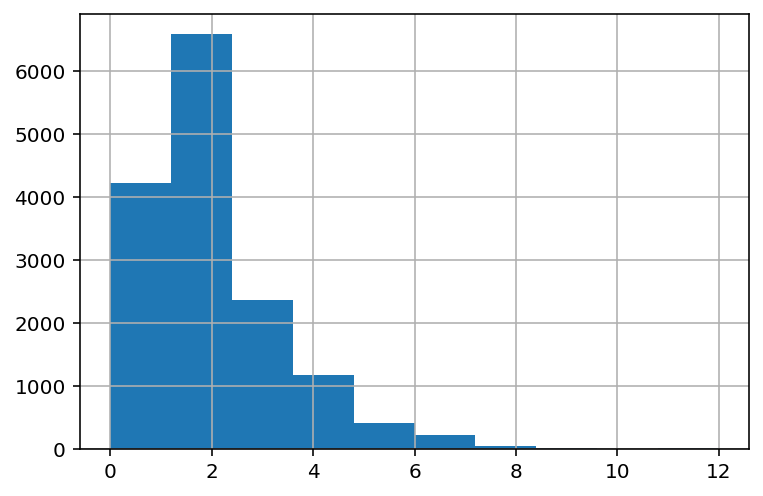

====
rooms
mean 6.164133333333333
std 1.958600518215801


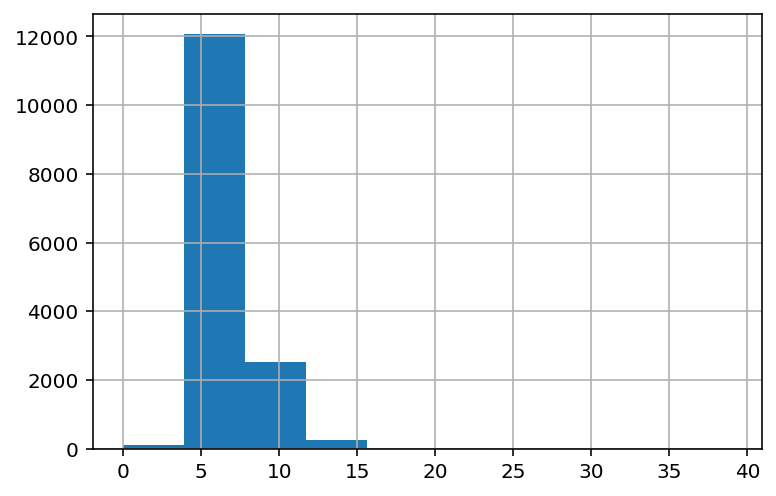

====
squareFootage
mean 1514.5044
std 830.6359987331762


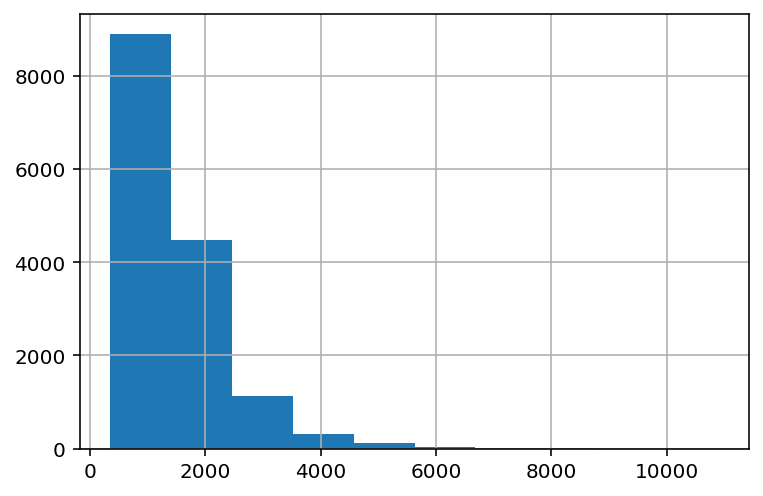

====
lotSize
mean 5820.7662
std 3013.279470369183


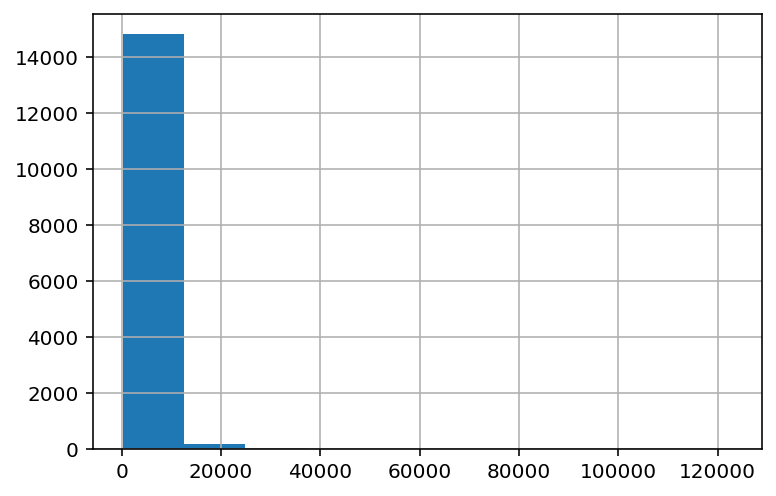

====
yearBuilt
mean 1929.3885333333333
std 33.82853430411162


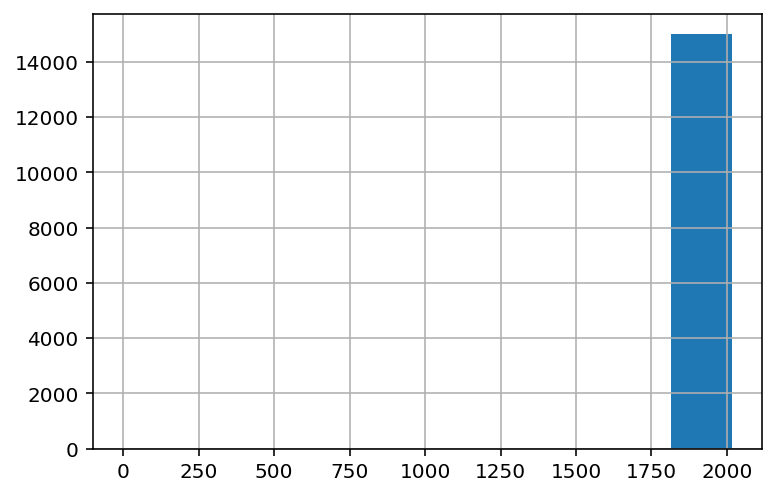

====
priorSaleAmount
mean 195216.20066666667
std 313797.90664518543


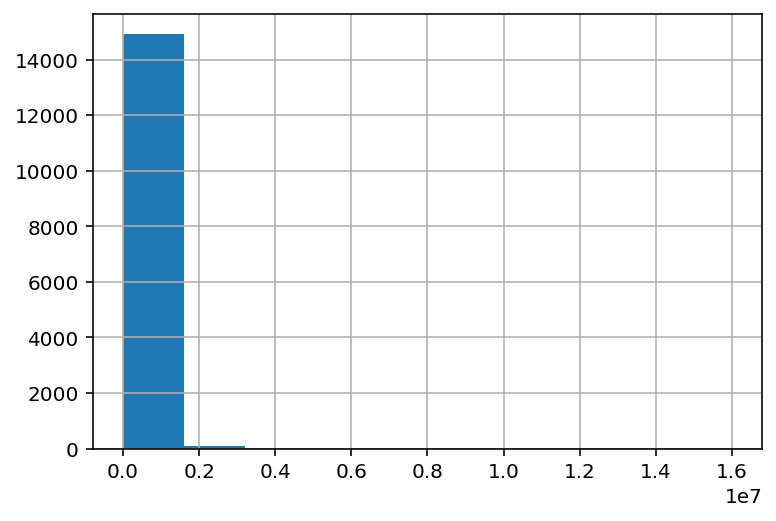

In [41]:
for i in X.columns:
    print('====')
    print(i)
    X.loc[:,i].hist()
    print('mean', X.loc[:,i].mean())
    print('std', X.loc[:,i].std())
    plt.show()

In [32]:
X2= X[(X.bedrooms<7) & (X.bathrooms<7)]   #drop outliers

In [47]:
sns.boxplot(X[['bedrooms', 'bathrooms', 'rooms']])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [0]:
## Dimensionality Reduction --> compress the feature space

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(4)                             # 4 components  (4 columns)
X_transformed = pca.fit_transform(X)

In [39]:
X_transformed.shape      # dimensions of X_transformed (has 4 columns)

(15000, 4)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y)
lr = LinearRegression()
lr.fit(X_train,y_train)   # training, fit uses one subdataset
lr.score(X_test,y_test)   # evaluate, scoring, R2 uses one subdataset

#improves a bit

0.7630205554237848